In [1]:
import numpy as np
import scanpy as sc
import scycle as cc
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 70

import os

import sys
DATA_PATH = '/home/risitop/OneDrive/Documents/PHD/y1/data/EwingSarcoma_Miller2020/'
sys.path.append(DATA_PATH)
plt.style.use('dark_background')

In [2]:
# We start from CPM_data.h5ad, which contains CPM_data.txt + Metadata.txt annotations
adata_src = sc.read_h5ad(DATA_PATH + 'CHLA9.h5ad').T
adata_src.obs_names_make_unique()
adata_src.var_names_make_unique()
adata_src

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 4800 × 13287

In [3]:
adata_ref = sc.read_h5ad(DATA_PATH + 'CHLA10.h5ad').T
adata_ref.obs_names_make_unique()
adata_ref.var_names_make_unique()
adata_ref

AnnData object with n_obs × n_vars = 4605 × 14105

In [4]:
cc.pp.prep_pooling(adata_src, max_counts=50000, max_mt_ratio=10)
cc.pp.prep_pooling(adata_ref, max_counts=50000, max_mt_ratio=10)

Preparing embedding...
3862 samples pass the count filter
4159  samples pass the mt filter
Samples selected 3460
Embedding for pooling...
Pooling 3460 samples...
Preparing embedding...
3476 samples pass the count filter
4013  samples pass the mt filter
Samples selected 3019
Embedding for pooling...
Pooling 3019 samples...


In [6]:
cc.tl.dimensionality_reduction(adata_ref, method="ica")

-- Dimensionality reduction using ICA...
*- ICA did not converge. Retrying...
-- Done


In [7]:
cc.tl.integration(adata_src, adata_ref, verbose=True)

-- Automatically detecting cell-cycle components...
-- Integrating datasets...
> Selecting common genes...
> 9222 genes selected.
> Slicing matrices...
> Computing distance matrix...
> Computing optimal transport plan...
> Projecting source dataset...


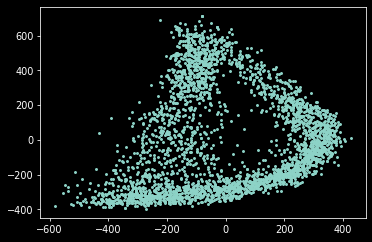

In [8]:
X = adata_ref.obsm['X_4ICs']
plt.scatter(X[:,0], X[:,1], s=4)

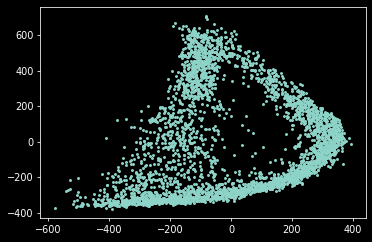

In [9]:
X = adata_src.obsm['X_4ICs']
plt.scatter(X[:,0], X[:,1], s=4)